<div align='center'><h1 style='font-size: 30px;'><b>Entregable - Taller 3</b></h1></div>

---

**Modelo hidrodinámico de Housner (1963) para tanques rectangulares con Handcalcs**

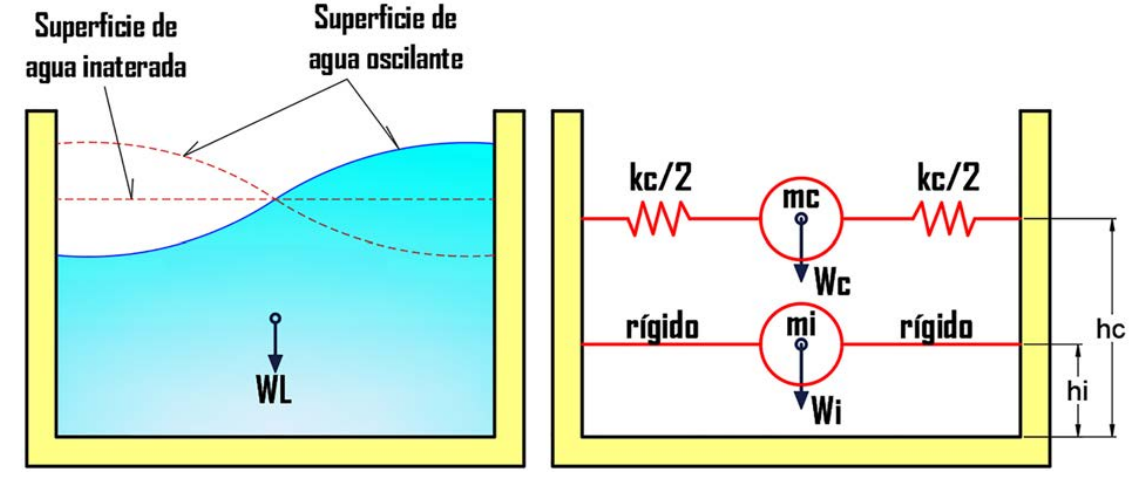

<div align="justify">

Los tanques de almacenamiento de líquidos, especialmente aquellos destinados al suministro de agua potable, son de gran relevancia tanto a nivel local como internacional. Su diseño estructural debe adherirse a normativas específicas como la ACI350.3-01 para el diseño sísmico de estructuras de concreto que contienen líquidos y la ACI 371R-98 para el análisis, diseño y construcción de torres de agua con pedestal de concreto, además de considerar las recomendaciones de la ACI 318-08 y ACI 350-01 cuando sea pertinente. Estos tanques requieren atención particular debido a las fuerzas inerciales generadas por fenómenos hidrodinámicos durante eventos sísmicos. 

Históricamente, estudios como los de Westergaard (1933), Jacobsen (1949), Werner y Sundquist (1949), y Graham y Rodríguez (1952) han abordado el análisis de presiones impulsivas y convectivas en diferentes formas y estructuras de contenedores líquidos. Específicamente, en tanques cilíndricos de concreto reforzado, se ha demostrado que una relación altura-diámetro $(H/D)$ elevada implica una predominancia de masa en condiciones impulsivas, mientras que una relación $H/D$ menor favorece un comportamiento convectivo de la masa líquida.
</div>

In [1548]:

import numpy as np
from IPython.display import HTML
import handcalcs
import handcalcs.render
from handcalcs.decorator import handcalc
import forallpeople
import handcalcs.render
forallpeople.environment('structural',top_level=True)
from math import sqrt, sin, asin, pi, tanh, cosh, sinh


**1. Datos del modelo**

1.1. <u>Propiedades de los materiales:</u>

In [1549]:
%%render 2
#symbolic
gamma_w = 10000*N_m3             # Peso específico del agua
f_prime_c = 27*MPa               # Resistencia a la compresión del concreto
E_c = 4700*sqrt(f_prime_c)*MPa   # Módulo de elasticidad del concreto
gamma_c = 24000*N_m3             # Peso específico del concreto
f_y = 410*MPa                    # Resistencia a la fluencia del acero
E_s = 200000*MPa                 # Módulo de elasticidad del acero
n = round(E_s/E_c, 0)            # Relación modular acero-concreto


<IPython.core.display.Latex object>

1.2. <u>Parámetros sísmicos:</u>

<div align="justify">
Tanto el componente impulsivo y convectivo de la presión hidrodinámica representan una fracción del peso del fluido que para el componente impulsivo se considera una masa que oscila en conjunto con la estructura contenedora; mientras que el componente convectivo refiere a una oscilación producto de la respuesta inercial del fluido. Ambos pesos se definen mediante las expresiones de Housner (1963).
</div>

In [1550]:
%%render 2

Z = 0.25 # Parámetro de sitio
I = 1.00 # Parámetro de importancia
S = 1.20 # Parámetro de suelo
T_p = 0.6*s
T_L = 2.00*s
Ri = 2.00  
Rc = 1.00
g = 9.81*m/s**2

<IPython.core.display.Latex object>

1.3. <u>Dimensiones del modelo:</u>

In [1551]:
%%render 2
#symbolic

e_m = 0.50*m   # Espesor de muro
h = 1.40*m     # Altura de muro
B = 4.50*m     # Ancho de muro
L = 10.40*m    # Distancia entre muros
H_L = 1.40*m   # Altura de agua


<IPython.core.display.Latex object>

**2. Cálculos de parámetros dinámicos**

**2.1. Peso de muros y líquidos**

In [1552]:
%%render 2
#long
W_w = 2*h*B*e_m*gamma_c # Peso neto de los muros
H_L = 1.4*m # Altura media de líquido
W_L = gamma_w*H_L*B*L #Peso del líquido


<IPython.core.display.Latex object>

**2.2. Coeficiente de masa equivalente**

In [1553]:
%%render 2
#long
D = L
epsilon = (0.0151*(D/H_L)**2 - 0.1908*(D/H_L) + 1.021)
W_wc = epsilon*W_w #Peso efectivo de los muros

<IPython.core.display.Latex object>

**2.3. Peso impulsivo y convectivo**

In [1554]:
%%render 2

W_i = ((tanh(0.866*D/H_L))/(0.866*D/H_L))*W_L
W_c = ((tanh(3.16*H_L/D))*(0.264*D/H_L))*W_L
W_comp = W_i + W_c 

<IPython.core.display.Latex object>

**2.4. Altura impulsiva y convectiva**

In [1555]:
%%render 2
if D/H_L<1.333: h__i = H_L*(0.5-0.09375*D/H_L)
elif 1.333<= D/H_L: h_i= H_L*0.375 # Altura impulsiva

h_c = (1-(cosh(3.68*H_L/D)-2.01)/(3.68*(H_L/D)*sinh(3.68*H_L/D)))*H_L # Altura convectiva

h_w = h/2 # Altura estática

<IPython.core.display.Latex object>

**2.5. Masas efectivas, impulsiva y convectivas**

In [1556]:
%%render 2
#long
m_w = W_w/g 
m_i = W_i/W_L * 0.5*D*H_L*gamma_w/g * 1*m


<IPython.core.display.Latex object>

**2.6. Altura efectiva**

In [1557]:
%%render 2
#long
h_e = (h_w*m_w + h_i*m_i) / (m_w + m_i)

<IPython.core.display.Latex object>

**2.7. Rigidez del muro**

In [1558]:
%%render 2
#long
k_w = ((E_c)/4)*(e_m/h_e)**3 / 1*m

<IPython.core.display.Latex object>

**2.8. Frecuencia y periodo de vibración natural**

<div align="justify">
El periodo convectivo calculado es indicado para un valor de amortiguamiento de β=5%, no obstante el amortiguamiento del agua se ha predefinido para β=0.5%; en todo caso, para el ajuste de Tc, se dispone:
</div>

In [1559]:
%%render 2
#long
lamb = sqrt(3.16*32.17*tanh(3.16*H_L/L))

w_c = lamb/sqrt(L*3.28084)*1/s
w_i = sqrt(k_w/(m_w+m_i))*1000*1/s

T_c = 2*pi/lamb * sqrt(D*3.28084)*s
T_i = 2*pi*sqrt((m_w+m_i)/k_w)/1000*s

<IPython.core.display.Latex object>

**2.9. Factores de amplificación espectral**

In [1560]:
%%render 2
#long
if T_c < T_p: A_cc = 1.00
elif T_p < T_c < T_L: A_cc = 1.50
elif T_c > T_L: A_cc = sqrt(1.5)

if T_i < T_p: C_i = 2.50
elif T_p < T_i < T_L: C_i = 2.50*T_p/T_L
elif T_i > T_L: C_i = 2.50*(T_p*T_L/T_i**2) # Factor C para componente impulsivo

if T_c < T_p: C_c = 2.50
elif T_p < T_c < T_L: C_c = A_cc*2.50*T_p/T_L
elif T_c > T_L: C_c = A_cc*2.50*(T_p*T_L/T_c**2) # Factor C para componente convectivo

<IPython.core.display.Latex object>

**2.10. Rigidez convectiva**

In [1561]:
%%render 2

k_c = (0.833*W_L/H_L)*(tanh(3.16*H_L/D))**2

<IPython.core.display.Latex object>

**2.11. Presión estática e hidrodinámica vertical**

In [1562]:
%%render 2
#long
q_hy = H_L*gamma_w #Presión estática
C_v = 1.00 #Factor de amplificación vertical
u_v = Z*S*C_v*I*(2/3)/Ri #Aceleración vertical
p_hy = u_v*q_hy #presión vertical


<IPython.core.display.Latex object>

**3. Fuerzas cortantes inducidas por sismo**

In [1563]:
%%render 2
#short
P_w = Z*S*I*C_i*(epsilon*W_w)/Ri
P_i = Z*S*I*C_i*(epsilon*W_i)/Ri
P_c = Z*S*I*C_c*(epsilon*W_c)/Rc
P_v = p_hy*L*H_L

<IPython.core.display.Latex object>

<div align="justify">
La cortante basal debido a fuerzas sísmicas hidrodinámicas aplicadas en el fondo del contenedor es:
</div>

In [1564]:
%%render 2
#short
V_hd = sqrt((P_i+P_w)**2 + P_c**2 + P_v**2) * kN

<IPython.core.display.Latex object>